In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
mobile_data = pd.read_csv('mobile_price_data.csv')

In [3]:
mobile_data.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


In [4]:
mobile_data.describe()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
count,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459
unique,363,139,165,2,36,48,18,3,18,7,7,49,15,18,1,34,70,81,55,62
top,"Vivo Z1Pro (Sonic Black, 64 GB)","₹11,999",Black,Dual Sim,16.51 cm (6.5 inch),2340 x 1080 pixels,Android Pie 9,Octa Core,2 GHz,64 GB,4 GB,13MP + 2MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,4000 mAh,75.6 mm,156.7 mm,8.8 mm,191 g
freq,4,19,28,458,51,66,126,444,149,185,160,72,112,139,459,135,35,23,48,27


In [5]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    459 non-null    object
 1   mobile_price   459 non-null    object
 2   mobile_color   459 non-null    object
 3   dual_sim       459 non-null    object
 4   disp_size      459 non-null    object
 5   resolution     459 non-null    object
 6   os             459 non-null    object
 7   num_cores      459 non-null    object
 8   mp_speed       459 non-null    object
 9   int_memory     459 non-null    object
 10  ram            459 non-null    object
 11  p_cam          459 non-null    object
 12  f_cam          459 non-null    object
 13  network        459 non-null    object
 14  bluetooth      459 non-null    object
 15  battery_power  459 non-null    object
 16  mob_width      459 non-null    object
 17  mob_height     459 non-null    object
 18  mob_depth      459 non-null   

In [6]:
mobile_data.shape

(459, 20)

In [7]:
status = dict(zip(mobile_data.columns,list([0]*len(mobile_data.columns))))

In [8]:
def print_processed_status(mobile_data):
    for col in mobile_data.columns:
        print(col, status[col])

In [9]:
print_processed_status(mobile_data)

mobile_name 0
mobile_price 0
mobile_color 0
dual_sim 0
disp_size 0
resolution 0
os 0
num_cores 0
mp_speed 0
int_memory 0
ram 0
p_cam 0
f_cam 0
network 0
bluetooth 0
battery_power 0
mob_width 0
mob_height 0
mob_depth 0
mob_weight 0


In [10]:
def numericize(mobile_data,col):
    return pd.to_numeric(mobile_data[col].str.replace('[a-zA-Z]','',regex=True))

In [11]:
mobile_data['mp_speed'] = numericize(mobile_data,'mp_speed')
mobile_data['mp_speed'].unique()
status['mp_speed'] = 1

In [12]:
mobile_data['int_memory'] = numericize(mobile_data,'int_memory')
mobile_data['int_memory'].unique()
status['int_memory'] = 1

In [13]:
mobile_data['ram'] = numericize(mobile_data,'ram')
mobile_data['ram'].unique()
status['ram'] = 1

In [14]:
mobile_data['battery_power'] = numericize(mobile_data,'battery_power')
mobile_data['battery_power'].unique()
status['battery_power'] = 1

In [15]:
mobile_data['mob_width'] = numericize(mobile_data,'mob_width')
mobile_data['mob_width'].unique()
status['mob_width'] = 1

mobile_data['mob_depth'] = numericize(mobile_data,'mob_depth')
mobile_data['mob_depth'].unique()
status['mob_depth'] = 1

mobile_data['mob_height'] = numericize(mobile_data,'mob_height')
mobile_data['mob_height'].unique()
status['mob_height'] = 1

mobile_data['mob_weight'] = numericize(mobile_data,'mob_weight')
mobile_data['mob_weight'].unique()
status['mob_weight'] = 1

In [16]:
mobile_data._get_numeric_data()

,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,2.0,32,3,5000,75.0,164.4,8.95,195.0
1,2.0,32,3,5000,75.0,164.4,8.95,195.0
2,2.0,64,4,5000,75.0,164.4,8.95,195.0
3,2.0,64,4,5000,75.0,164.4,8.95,195.0
4,2.0,128,4,5000,75.4,164.4,9.00,199.0
...,...,...,...,...,...,...,...,...
454,2.5,32,3,3180,73.1,150.5,7.70,143.0
455,2.5,16,2,3180,73.1,150.5,7.70,143.0
456,2.0,64,4,3400,75.3,156.0,7.80,158.0
457,2.1,128,4,4020,76.1,162.0,8.30,188.0


In [17]:
def edit_numericize(mobile_data,col,strs_to_remove):
    processed = mobile_data[col]
    for string in strs_to_remove:
        processed = processed.str.replace(string,'',regex=False)
    return pd.to_numeric(processed)

In [18]:
mobile_data['mobile_price'] = edit_numericize(mobile_data,'mobile_price',['₹',','])
mobile_data['mobile_price'].unique()
status['mobile_price'] = 1

<AxesSubplot:>

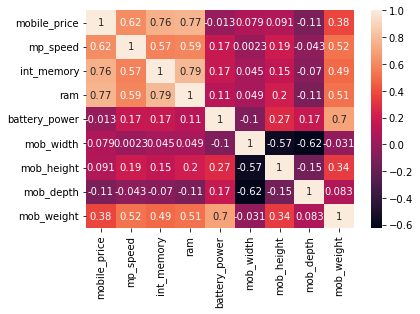

In [19]:
sns.heatmap(mobile_data.corr(),annot=True)

In [20]:
x = mobile_data[['mp_speed','int_memory','ram','battery_power','mob_width','mob_height','mob_depth','mob_weight']]

In [21]:
y = mobile_data['mobile_price']

In [22]:
mm = MinMaxScaler()
mm.fit_transform(x)

array([[0.42168675, 0.04761905, 0.18181818, ..., 0.93676172, 0.01948052,
        0.76470588],
       [0.42168675, 0.04761905, 0.18181818, ..., 0.93676172, 0.01948052,
        0.76470588],
       [0.42168675, 0.11111111, 0.27272727, ..., 0.93676172, 0.01948052,
        0.76470588],
       ...,
       [0.42168675, 0.11111111, 0.27272727, ..., 0.88664837, 0.00590319,
        0.32941176],
       [0.48192771, 0.23809524, 0.27272727, ..., 0.92244362, 0.01180638,
        0.68235294],
       [0.48192771, 0.23809524, 0.27272727, ..., 0.92244362, 0.01180638,
        0.68235294]])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [24]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
lr.predict(x_test)

array([22320.84342497, 14624.60921216, 14790.92404442, 25254.06574975,
       16947.06161285, 10859.77684647, 41345.69200038, 15330.49543076,
       12906.70441188, 19108.3617756 , 18653.81314933, 14624.60921216,
       21920.51362581, 18850.27974495, 15008.22135601, 19594.41818818,
       28876.47129513, 11595.98631197, 10651.61002148,  5075.44043089,
       25327.30197277, 22320.84342497, 23971.7119035 , 20928.24030047,
        7598.67320476, 14105.85068163,  6948.96531787,  7692.29956936,
       13929.57089194, 11181.78197373, 25582.18527005, 14790.92404442,
       45706.48671594, 17145.5233018 , 24123.05535851, 10568.66038039,
        6040.80199905, 35011.73335513, 15166.86980848, 21194.66493719,
       12015.3045076 ,  9661.94566364,  8492.20516545, 11156.77127052,
       20340.46103426, 12480.58553963, 18166.51237109, 13755.42362838,
       22192.79208151, 28143.65365138, 14604.76499037, 30842.7616139 ,
       18166.51237109, 15166.86980848, 13370.82488553, 11609.51034176,
      

In [28]:
lr.score(x_test,y_test)

0.7186911609961201